In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [3]:
# 1. Chargement du dataset
url = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    366 non-null    object 
 1   MAX_TEMPERATURE_C       366 non-null    int64  
 2   MIN_TEMPERATURE_C       366 non-null    int64  
 3   WINDSPEED_MAX_KMH       366 non-null    int64  
 4   TEMPERATURE_MORNING_C   366 non-null    int64  
 5   TEMPERATURE_NOON_C      366 non-null    int64  
 6   TEMPERATURE_EVENING_C   366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     366 non-null    float64
 8   HUMIDITY_MAX_PERCENT    366 non-null    int64  
 9   VISIBILITY_AVG_KM       366 non-null    float64
 10  PRESSURE_MAX_MB         366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  366 non-null    float64
 12  HEATINDEX_MAX_C         366 non-null    int64  
 13  DEWPOINT_MAX_C          366 non-null    int64  
 14  WINDTEMP_MAX_C          366 non-null    in

In [4]:
df.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,...,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000
mean,16.997268,11.259563,20.991803,10.631148,15.770492,15.275956,3.169126,86.603825,9.237022,1019.562842,...,11.256831,9.707650,160.926230,166.172131,181.278689,0.0,3.639344,9.269126,6.513661,15.756831
std,6.369232,4.510670,8.546565,4.601133,6.018857,6.450046,6.408436,7.501151,1.059369,8.309106,...,4.225123,5.728018,74.537276,81.604763,93.009523,0.0,1.681807,3.399074,3.455958,8.823592
min,5.000000,0.000000,3.000000,-1.000000,3.000000,3.000000,0.000000,47.000000,3.000000,982.000000,...,0.000000,-5.000000,113.000000,113.000000,113.000000,0.0,1.000000,3.300000,1.000000,1.000000
25%,12.000000,8.000000,14.000000,8.000000,11.000000,10.000000,0.000000,83.000000,8.750000,1016.000000,...,8.000000,6.000000,116.000000,116.000000,116.000000,0.0,3.000000,6.700000,4.000000,8.000000
50%,16.000000,11.000000,20.000000,11.000000,15.000000,14.000000,0.400000,88.500000,9.875000,1020.000000,...,12.000000,10.000000,119.000000,116.000000,122.000000,0.0,4.000000,9.100000,7.000000,16.000000
75%,21.000000,15.000000,26.000000,14.000000,20.000000,20.000000,2.900000,92.000000,10.000000,1024.000000,...,14.000000,14.000000,176.000000,176.000000,176.000000,0.0,5.000000,11.600000,9.750000,23.000000
max,38.000000,23.000000,50.000000,23.000000,35.000000,37.000000,53.300000,99.000000,10.000000,1044.000000,...,22.000000,23.000000,353.000000,389.000000,389.000000,0.0,8.000000,14.500000,12.000000,31.000000


In [5]:
# 2. Création de slices
X = df.select_dtypes(include="number")
y = df['OPINION']

In [6]:
# 3. Mise à l'échelle des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# 4. Analyse en composantes principales (PCA)
pca = PCA()
pca.fit(X_scaled)

PCA()

In [8]:
# 5. Détermination du nombre de composantes principales
variance_ratio = pca.explained_variance_ratio_
cumulative_variance = variance_ratio.cumsum()
print("Composantes pour 70% de variance:", (cumulative_variance <= 0.7).sum())
print("Composantes pour 80% de variance:", (cumulative_variance <= 0.8).sum())

Composantes pour 70% de variance: 3
Composantes pour 80% de variance: 5


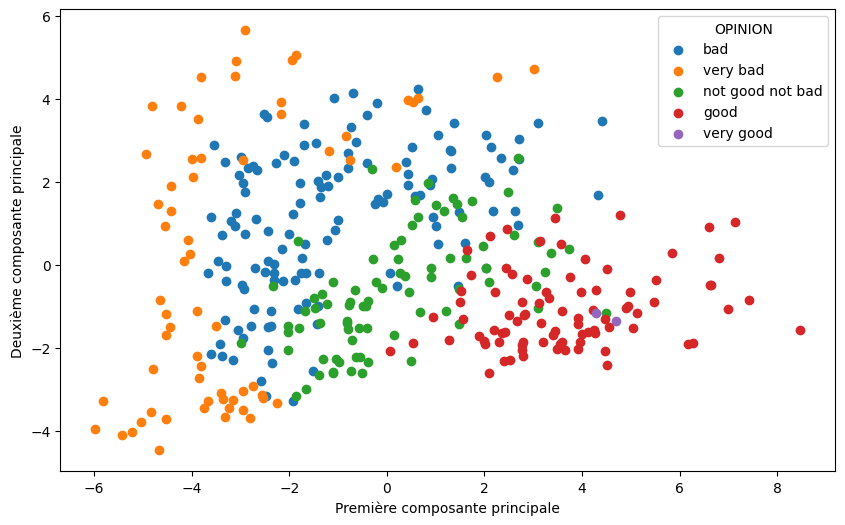

In [12]:
# 6. Transformation des données avec PCA
X_pca = pca.fit_transform(X_scaled)

# Création du nuage de points avec une légende
plt.figure(figsize=(10, 6))
for opinion in y.unique():
    plt.scatter(X_pca[y == opinion, 0], X_pca[y == opinion, 1], label=opinion)

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.legend(title='OPINION')
plt.show()

In [10]:
# 7. Classification KNN
knn = KNeighborsClassifier()
knn.fit(X_scaled, y)
score_scaled = knn.score(X_scaled, y)
print("Score KNN sur données scalées:", score_scaled)

Score KNN sur données scalées: 0.8661202185792349


In [11]:
knn.fit(X_pca[:, :2], y)
score_pca = knn.score(X_pca[:, :2], y)
print("Score KNN sur données PCA:", score_pca)

Score KNN sur données PCA: 0.8469945355191257
